#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Valeria Alejandra Ramírez Herrera - A01240716
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [64]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
from sklearn.metrics import fbeta_score, make_scorer

import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV

from sklearn import tree
import pydotplus 
from IPython.display import Image
from graphviz import Digraph

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

1. Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

NOTA: Si lo deseas, puedes traducirlos y ponerlas en español.

#**Ejercicio-1.** 

In [65]:
#Importación de datos

input = 'https://data.ub.uni-muenchen.de/23/2/kredit.asc' 

In [66]:
#Se crea el dataframe respectivo y se hace la lectura de los primeros 5 renglones para verificar que todo OK

df = pd.read_table(input, sep=' ')
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [67]:
#Se renombran las columnas de alemán a inglés de acuerdo con las indicaciones, en un nuevo dataframe

ndf= df.copy()
ndf.rename(columns ={'kredit':'credit_risk','laufkont':'status','laufzeit':'duration',
                     'moral':'credit_history','verw':'purpose','hoehe':'amount',
                     'sparkont':'savings','beszeit':'employment_duration',
                     'rate':'installment_rate','famges':'personal_status_sex',
                     'buerge':'other_debtors','wohnzeit':'present_residence',
                     'verm':'property','alter':'age','weitkred':'other_installment_plans',
                     'wohn':'housing','bishkred':'number_credits','beruf':'job',
                     'pers':'people_liable','telef':'telephone','gastarb':'foreign_worker'},
                     inplace = True)
ndf.head()

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


2. Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.

#**Ejercicio-2.**

In [68]:
#Se define X como las 20 variables de entrada del documento 

X = ndf.iloc[:,1:] 
X.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [69]:
#Se define Y como la variable de salida del documento 

Y = ndf.iloc[:,0] 
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [70]:
#Se realiza la partición de datos con 85% de entrenamiento y prueba 15%, y se comprueba la dimensión de cada una

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15, random_state = 0)
 

print(Xtrain.shape, ': dimensión de datos de entrada para entrenamiento')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(Ytrain.shape, ': dimensión de variable de salida para entrenamiento')
print(Ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento
(150,) : dimensión de variable de salida para prueba


3. Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:

**Así quedó nuestra definición de variables:**

Variables CATEGORICAL: 'status', 'credit_history', 'purpose', 'savings', 'personal_status_sex','other_debtors','other_installment_plans', 'housing'

Variables ORDINAL/DISCRETIZED QUANTITATIVE: 'employment_duration', 'installment_rate', 'property', 'number_credits', 'job','present_residence'

Variables QUANTITATIVE: 'duration', 'amount', 'age'

Variables BINARY: 'telephone', 'foreign_worker', 'credit_risk', 'people_liable'

#**Ejercicio-3.**

3.a Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).

3.b Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.

3.c Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.


In [71]:
# 3.A Transformaciones a factores QUANTITATIVE de entrada:
# Variables numérica se colocan en rango y se elige mediana si es que llegan a faltar datos
# pues estandarizaremos con z-core después
numeric_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                     
# 3.B Aquí se hace la transformación MinMaxScaler para escalar todas a un rango equiparable                                      
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))]) 
numeric_pipeline_nombres = ['duration', 'amount', 'age'] 



# Transformaciones a factores CATEGORICAL de entrada:
# Variables categóricas se elige moda si es que llegan a faltar datos
categ_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))]) 
categ_pipeline_nombres = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex',
                           'other_debtors','other_installment_plans', 'housing']



# Transformaciones a factores DISCRETIZED QUANTITATIVE de entrada:
# Variables discretas se elige moda si es que llegan a faltar datos
discrete_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))]) 
discrete_pipeline_nombres = ['employment_duration', 'installment_rate', 'property', 
                             'number_credits', 'job','present_residence']



# Transformaciones a factores BINARY de entrada:
# Variables discretas se elige moda si es que llegan a faltar datos
binary_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
binary_pipeline_nombres = ['telephone', 'foreign_worker', 'people_liable']



# 3.C Transformaciones One-Hot encoding a las variables de entrada de tipo categórico y binaria:

# Se quita el primer renglón para evitar poner nombres
# La importancia de convertir las binarias es que OneHotE convierte 
# factores a columnas/vectores dependiendo la cantidad de categorías
cat_binOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])                                                          
cat_binOHE_pipeline_nombres = [ 'status', 'credit_history', 'purpose', 'savings', 
                               'personal_status_sex','other_debtors','other_installment_plans', 'housing', 
                           'telephone', 'foreign_worker', 'people_liable'] 



# Conjuntamos las transformaciones
columnasTransformer = ColumnTransformer(transformers =                                       
                                        [('numpipe', numeric_pipeline, numeric_pipeline_nombres), 
                                        ('disimp', discrete_pipeline, discrete_pipeline_nombres), 
                                        ('binpipe', binary_pipeline, binary_pipeline_nombres),
                                        ('categpipe', categ_pipeline, categ_pipeline_nombres),
                                        ('catbinohe', cat_binOHE_pipeline, cat_binOHE_pipeline_nombres)],
                                        remainder='passthrough')

4. Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características:


4.a Usa los parámetros predeterminados de cada modelo.

#**Ejercicio-4.**

In [74]:
#4.A Se usan los parámetros predeterminados y se crea la función para llamarlos a todos

def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(max_iter=3000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RFC - Random Forest:
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')

  return modelos, nombres



# FUNCIÓN PARA SACAR TODAS LAS MÉTRICAS
def mis_metricas(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
   
     gmean = np.sqrt((vp/(vp+fn))*((vn/(vn+fp))))
     recall= vp / (vp+fn)
     accuracy = (vp + vn) / (vp + fn + vn + fp)
     precision = vp / (vp + fp)
     fscore = (2 * vp) / ((2*vp) + fp + vn)  
     return accuracy, recall, gmean, precision, fscore



# FUNCIÓN PARA EL GMEAN
def mi_gmean(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot     
     gmean = np.sqrt((vp/(vp+fn))*((vn/(vn+fp))))
     return gmean   
    
    
    
# FUNCIÓN PARA ACCURACY
def mi_accuracy(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot    
     accuracy = (vp + vn) / (vp + fn + vn + fp)
     return accuracy

    
    
# FUNCIÓN PARA RECALL 
def mi_recall(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
     recall= vp / (vp+fn)
     return recall



# FUNCIÓN PARA PRECISIÓN
def mi_precision(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
     precision = vp / (vp + fp)       
     return precision 
    
    
    
# FUNCIÓN PARA F1SCORE    
def mi_fscore(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
     fscore = (2 * vp) / ((2*vp) + fp + vn) 
     return fscore   

In [76]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,i):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(17,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    if (i==6):
        plt.ylabel('f1 score') 
    else:    
        if (i==4):
           plt.ylabel('precision') 
        else:
            if(i<2):
               plt.ylabel('f1 score')
            else:
               plt.ylabel('recall')   

        plt.grid()
        plt.legend(loc='lower left')
        plt.show()
    
def mi_ModeloYCurvas(Xin,i):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = modelos[i]
 
       xcolumnas = columnasTransformer.fit(Xin)
       Xtransform = xcolumnas.transform(Xin)

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)


       
       delta_train_sz = np.linspace(0.1, 1.0, num=20)


       if(i<2):
          if(i==1):
             param_range, train_scores, test_scores = create_validation_curve(modelos[1], Xtrain, Ytrain, cv,
                                                                 'max_depth', make_scorer(mi_fscore))
             mi_ValidationCurvePlot(param_range, train_scores, test_scores,i=2) 

        
        
          else:
             tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_fscore),
                                                        random_state=0)
             mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)   
       else:
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_recall),
                                                        random_state=0)
          mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)  
       
       # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
       ######################################################################


       # Obtenemos el gráfico con las curvas de aprendizaje:
       #mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)
    

In [77]:
def mi_ValidationCurvePlot(train_sizes, train_scores, val_scores,i):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(17,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de max_depth')
    plt.xlabel('Max Depth de 1 a 20')
    if(i==3):
        plt.ylabel('recall') 
    else: 
       plt.ylabel('f1 score')  

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()
    

In [20]:
def create_validation_curve (model, x_val, y_val,cv,param_name,scoring= 'accuracy' ):
    
    pipe = Pipeline(steps = [
      ('cT', columnasTransformer ),
      ('model', model)
  ])
    
    param_range = np.linspace(1,20,20,dtype="int")

    t_scores, v_scores = validation_curve(
      estimator= pipe,
      X = x_val,
      y = y_val,
      param_name = f"model__{param_name}",
      param_range = param_range,
      cv = cv,
      scoring = scoring,
      )

    return param_range, t_scores, v_scores

4.b  En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).

4.c Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

4.d Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.

4.e En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:

     i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”.
     
     ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.
     
     iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.

Para los datos de test
LR:
mean Accuracy: 0.745 (0.0345)
mean Recall: 0.865 (0.0274)
mean Gmean: 0.632 (0.0613)
mean Precision: 0.791 (0.0268)
mean Fscore: 0.801 (0.0051)

Para los datos de train
LR:
mean Accuracy: 0.784 (0.0077)
mean Recall: 0.896 (0.0057)
mean Gmean: 0.683 (0.0167)
mean Precision: 0.814 (0.0082)
mean Fscore: 0.807 (0.0010)
 


Curvas de aprendizaje del modelo: LogisticRegression(max_iter=3000)


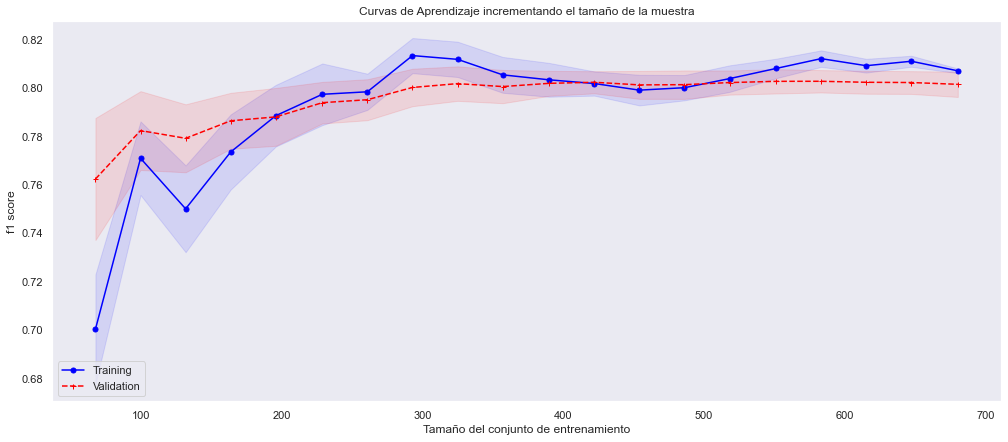

Para los datos de test
DT:
mean Accuracy: 0.690 (0.0230)
mean Recall: 0.774 (0.0323)
mean Gmean: 0.617 (0.0394)
mean Precision: 0.782 (0.0220)
mean Fscore: 0.783 (0.0071)

Para los datos de train
DT:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 0.824 (0.0000)
 


Curvas de aprendizaje del modelo: DecisionTreeClassifier()


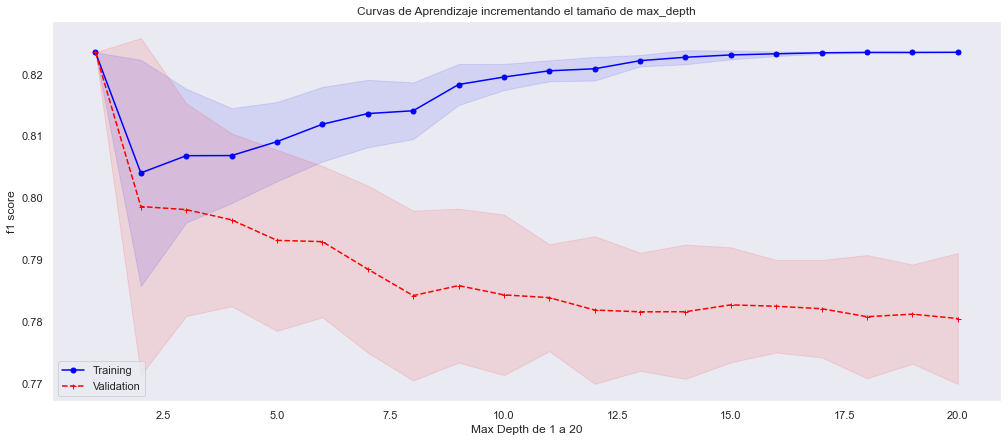

Para los datos de test
RFC:
mean Accuracy: 0.745 (0.0353)
mean Recall: 0.895 (0.0327)
mean Gmean: 0.592 (0.0652)
mean Precision: 0.776 (0.0245)
mean Fscore: 0.807 (0.0058)

Para los datos de train
RFC:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 0.824 (0.0000)
 


Curvas de aprendizaje del modelo: RandomForestClassifier()


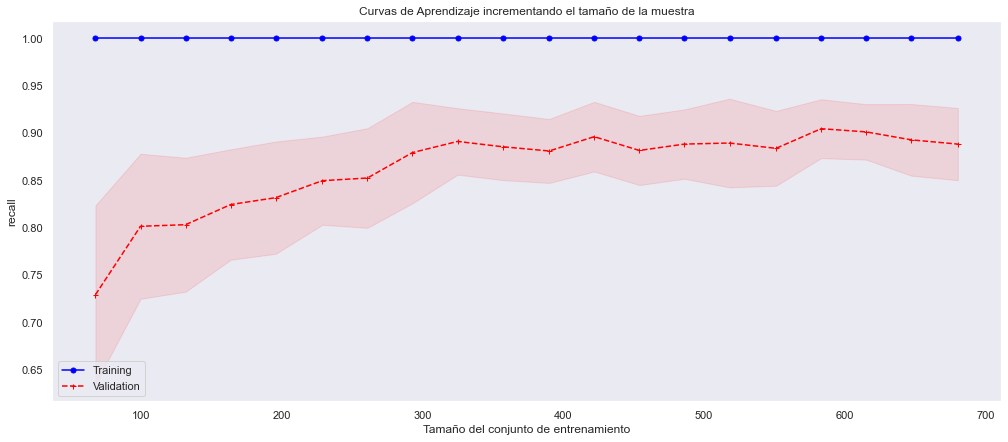

Diagrama de cajas y bigotes con métrica recall


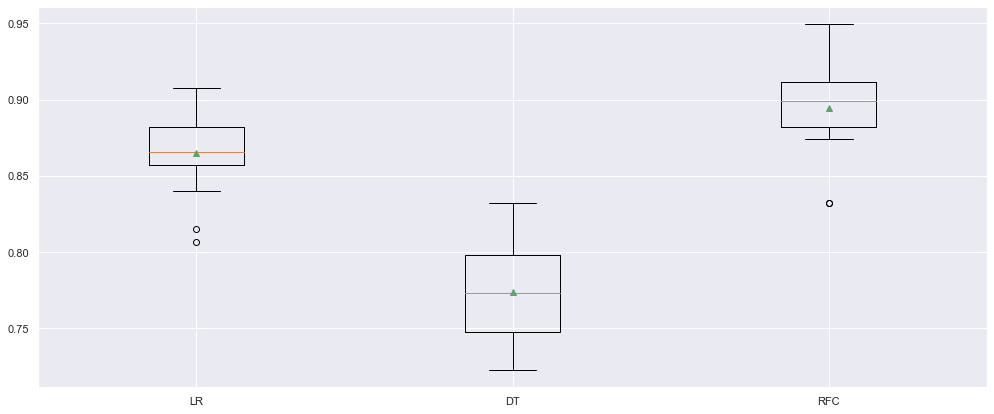

In [79]:
modelos, nombres = get_models()  # cargamos los modelos a comparar

scores_3d=list()

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])]) #a cada modelo se mete la info a cada uno de los modelos

# 4.C. 5 particiones y 3 repeticiones 
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0) 
    
# 4.B Se calculan todas las métricas en una sola iteración
  mismetricas_ = {'accuracy':make_scorer(mi_accuracy), 'recall':make_scorer(mi_recall), 
                  'gmean':make_scorer(mi_gmean),'precision':make_scorer(mi_precision),
                  'fscore':make_scorer(mi_fscore) }
    
# 4.C Validación cruzada estratificada  
  resultadosOU = cross_validate(pipeline, 
                          Xtrain, np.ravel(Ytrain),
                          scoring=mismetricas_,
                          cv=cv,
                          return_train_score=True)
 
  scores_3d.append(resultadosOU)
    
# 4.D Imprimimos todos los resultados 
  print("Para los datos de test")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_fscore']),
                                                                          np.std(resultadosOU['test_fscore']) 
                                                                          ))
  print("Para los datos de train")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']), 
                                                                          np.mean(resultadosOU['train_recall']),
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_gmean']),
                                                                          np.std(resultadosOU['train_gmean']),
                                                                          np.mean(resultadosOU['train_precision']),
                                                                          np.std(resultadosOU['train_precision']),
                                                                          np.mean(resultadosOU['train_fscore']),
                                                                          np.std(resultadosOU['train_fscore']) 
                                                                          ),"\n\n")
  print('Curvas de aprendizaje del modelo:',modelos[i])
# 4.E Aquí se generan las curvas de aprendizaje con los parámetros solicitados    
  mi_ModeloYCurvas(Xtrain,i)



# 4.D Diagrama de caja y bigotes para los tres modelos con la métrica recall
print('Diagrama de cajas y bigotes con métrica recall')
sns.set(rc={'figure.figsize':(17,7)})
bpGmean = list()
for i in range(len(scores_3d)):

  bpGmean.append(scores_3d[i]['test_recall'])

plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

5. Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. 

#**Ejercicio-5.**

5.a Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.
NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.

In [80]:
modelop = LogisticRegression(max_iter=10000, random_state=0)

pipeline = Pipeline(steps=[('cT',columnasTransformer),('m',modelop)])

dicc_grid = {'C':np.linspace(0.1,100,10),
             'solver':['newton-cg','lbfgs'],
             'class_weight':[None,'balanced'],
             'penalty':['l2']
                          }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

# 5.A Gridsearch con regresión logística y scorer de f1score
grid = GridSearchCV(estimator=modelop, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=make_scorer(mi_fscore))

Xcol = columnasTransformer.fit_transform(Xtrain)

grid.fit(Xcol, Ytrain)

print('Mejor valor de f1-score obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de f1-score obtenido con la mejor combinación: 0.8045986480063525
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
Métrica utilizada: make_scorer(mi_fscore)


In [25]:
def mi_ModeloYCurvasLRBest(Xin,valores_grid):
     # CAMBIAR VALORES A VALORES_GRID BEST SCORE
       modelo = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=valores_grid.best_params_.get('model__C'),
                            solver=valores_grid.best_params_.get('model__solver'),
                            class_weight=valores_grid.best_params_.get('model__class_weight'),

                            random_state=0)

       Xx = columnasTransformer.fit_transform(Xin)
       


       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

          
       delta_train_sz = np.linspace(0.1, 1.0, num=40)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo,    
                                                        X = Xx,
                                                        y = Ytrain,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_fscore) ,
                                                        random_state=0)
       
       i=0 
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)
      

In [26]:
def do_grid_search(model, X, y, cv, dicc_grid, scoring):

    #Nuestro pipe, otra vez
    grid_pipe = Pipeline(steps = [
        ('Correlation', columnasTransformer),
        ('model', model)
        ])

    #Creamos el grid
    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv,
        param_grid=dicc_grid, scoring=scoring)

    #Le entramos los valores. Recuerda que el .ravel() es para evitar un warning
    grid.fit(X, y.values.ravel())

    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)
    
    return grid



In [27]:
def mi_grafica(modelos,Xin,y,i):
       modelo = modelos
       i=i 
       xcolumnas = columnasTransformer.fit(Xin)
       Xtransform = xcolumnas.transform(Xin)

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)



       delta_train_sz = np.linspace(0.1, 1.0, num=40)


       if(i==4):
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_precision),
                                                        random_state=0)
       else:
        
          if(i==6):
                    tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_fscore),
                                                        random_state=0)
          else:  
            
              tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                            X = Xtransform,
                                                            y = Ytrain,
                                                            cv = mi_kfold ,
                                                            train_sizes = delta_train_sz ,
                                                            scoring = make_scorer(mi_recall),
                                                            random_state=0)


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)

In [81]:
Kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

dicc_grid = {'model__C':np.linspace(70, 100, 2),
             'model__solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'model__class_weight':[None,'balanced'],
             'model__penalty':['l1','l2','elasticnet', None]
             }
# 5.A Gridsearch con regresión logística y scorer de f1score
LR_grid = do_grid_search(modelos[0], Xtrain, Ytrain, Kfold, dicc_grid, make_scorer(mi_fscore))

Mejor valor de exactitud obtenido con la mejor combinación: 0.7993147109950756
Mejor combinación de valores encontrados de los hiperparámetros: {'model__C': 70.0, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Métrica utilizada: make_scorer(mi_fscore)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
780 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/

5.b Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

Curvas de aprendizaje del modelo LR Mejorado:


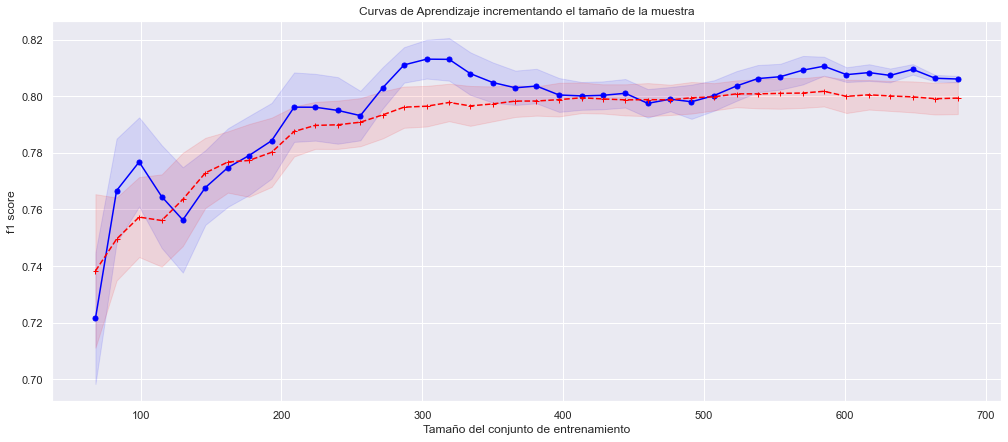

In [83]:
# 5.B Se manda a llamar la gráfica de LR con mejores hiperparámetros con métrica f1score
print('Curvas de aprendizaje del modelo LR Mejorado:')
mi_grafica (LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=LR_grid.best_params_.get('model__C'),
                            solver=LR_grid.best_params_.get('model__solver'),
                            class_weight=LR_grid.best_params_.get('model__class_weight')),Xtrain,Ytrain,i=6)

5.c Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones.

In [86]:
dicc_grid = {'model__ccp_alpha':np.linspace(0.0001, 100, 2),
             'model__criterion':['gini', 'entropy', 'log_loss'],
             'model__max_depth':np.linspace(1, 1000, 2,dtype=int),
             'model__min_samples_split':np.linspace(0.000001, 100, 2),
             'model__class_weight':['balanced',None],
             }
# 5.C Gridsearh de Decision Tree con métrica Precision
DT_grid = do_grid_search(modelos[1], Xtrain, Ytrain, Kfold, dicc_grid, make_scorer(mi_precision))

Mejor valor de exactitud obtenido con la mejor combinación: 0.8642506143955273
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0.0001, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 1, 'model__min_samples_split': 1e-06}
Métrica utilizada: make_scorer(mi_precision)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/

5.d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

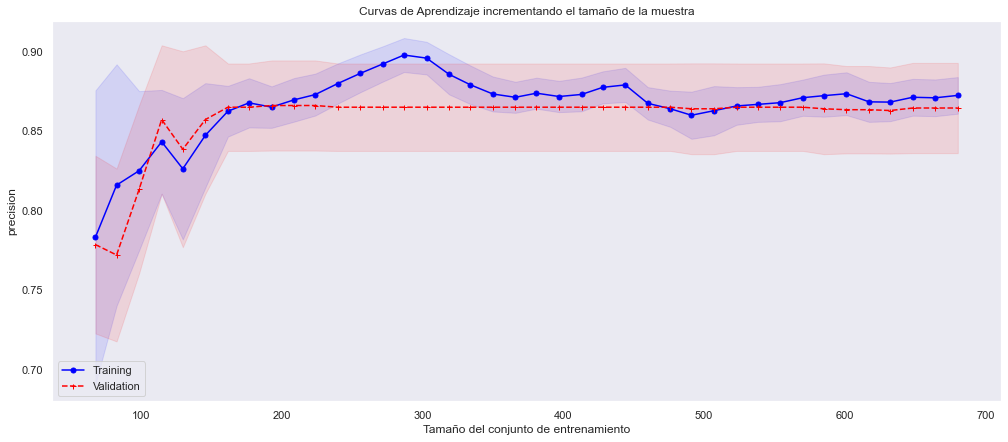

In [87]:
# 5.D Gráfica de DT con los mejores hiperparámetros con métrica Precision
mi_grafica (DecisionTreeClassifier( ccp_alpha=DT_grid.best_params_.get('model__ccp_alpha'),
                            class_weight=DT_grid.best_params_.get('model__class_weight'),
                            criterion=DT_grid.best_params_.get('model__criterion'),
            max_depth=DT_grid.best_params_.get('model__max_depth'),
            min_samples_split=DT_grid.best_params_.get('model__min_samples_split')),Xtrain,Ytrain,i=4)

5.e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.

In [108]:
dicc_grid = {'model__ccp_alpha':np.linspace(0.001, 1000, 2),
             'model__criterion':['entropy', 'log_loss'], # FALTA 'GINI'
             'model__max_depth':np.linspace(2, 10, 2,dtype=int), # FALTA 'NONE' y el LINSPACE
             'model__min_samples_split':[2,3], # FALTA EL LINSPACE
             'model__class_weight':['balanced','balanced_subsample',None],
             'model__n_estimators': [200]}
# 5.E Gridsearch de Random Forest con métrica recall
RF_grid = do_grid_search(modelos[2], Xtrain, Ytrain, Kfold, dicc_grid, 'recall')

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0.001, 'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Métrica utilizada: recall


5.f Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.


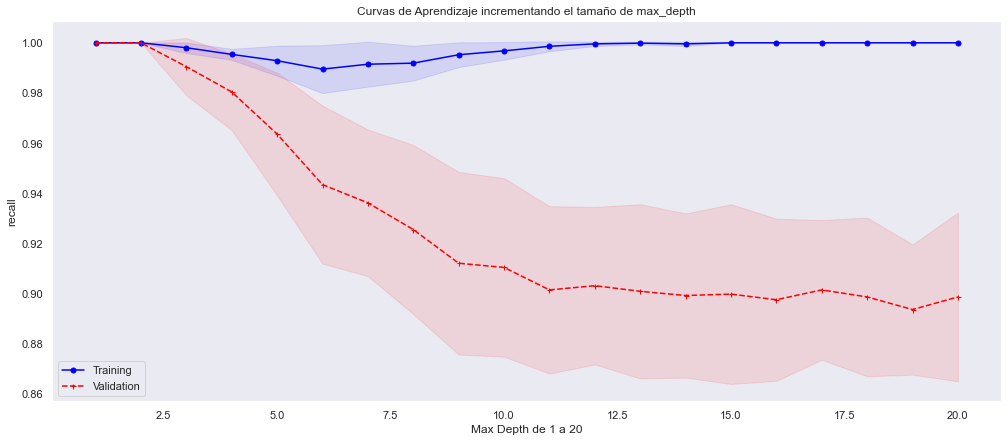

In [109]:
param_range, train_scores, test_scores = create_validation_curve(RandomForestClassifier(ccp_alpha=RF_grid.best_params_.get('model__ccp_alpha'),
                            class_weight=RF_grid.best_params_.get('model__class_weight'),
                            criterion=RF_grid.best_params_.get('model__criterion'),
            max_depth=RF_grid.best_params_.get('model__max_depth'),
            min_samples_split=RF_grid.best_params_.get('model__min_samples_split')), Xtrain, Ytrain, cv,'max_depth', make_scorer(mi_recall))

# 5.F Gráfica de RandomForest con mejores hiperparámetros con métrica recall
mi_ValidationCurvePlot(param_range, train_scores, test_scores,i=3) 

6. Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación:

#**Ejercicio-6.**

6.a Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

In [110]:
modeloLR_Final = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=LR_grid.best_params_.get('model__C'),
                            solver=LR_grid.best_params_.get('model__solver'),
                            class_weight=LR_grid.best_params_.get('model__class_weight'),
                            random_state=0)

Xct = columnasTransformer.fit(Xtrain)
Xxt = Xct.transform(Xtrain)
modeloLR_Final.fit(Xxt, np.ravel(Ytrain))

Xxtest = Xct.transform(Xtest)
print('Mejor valor de f1-score obtenido con la mejor combinación:', LR_grid.best_score_)

# 6.A Regresión Logística con mejores parámetros en el conjunto de prueba
print("Mejor valor del modelo de Regresion Logistica:", modeloLR_Final.score(Xxtest, np.ravel(Ytest)))

Mejor valor de f1-score obtenido con la mejor combinación: 0.7993147109950756
Mejor valor del modelo de Regresion Logistica: 0.7733333333333333


6.b Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.
Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

In [111]:
modeloDT_Final = DecisionTreeClassifier(max_depth=DT_grid.best_params_.get('model__max_depth'),
                                    ccp_alpha=DT_grid.best_params_.get('model__ccp_alpha'),                               
                                    class_weight=DT_grid.best_params_.get('model__class_weight'),                                
                                    criterion=DT_grid.best_params_.get('model__criterion'),
                                    min_samples_split=DT_grid.best_params_.get('model__min_samples_split'),
                                    random_state = 0)


Xct = columnasTransformer.fit(Xtrain)
Xxt = Xct.transform(Xtrain)
modeloDT_Final.fit(Xxt, np.ravel(Ytrain))

Xxtest = Xct.transform(Xtest)
print('Mejor valor de Precision obtenido con la mejor combinación:', DT_grid.best_score_)

# 6.B Decision Tree con mejores parámetros en el conjunto de prueba
print("Mejor valor del modelo del Arbol de Decision:", modeloDT_Final.score(Xxtest, np.ravel(Ytest)))

Mejor valor de Precision obtenido con la mejor combinación: 0.8642506143955273
Mejor valor del modelo del Arbol de Decision: 0.66


6.c Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.  Incluir un gráfico del árbol de decisión final obtenido.

In [116]:
modeloRFC_Final = DecisionTreeClassifier(max_depth=RF_grid.best_params_.get('model__max_depth'),
                                    ccp_alpha=RF_grid.best_params_.get('model__ccp_alpha'),                               
                                    class_weight=RF_grid.best_params_.get('model__class_weight'),                                
                                    criterion=RF_grid.best_params_.get('model__criterion'),
                                    min_samples_split=RF_grid.best_params_.get('model__min_samples_split'),
                                    random_state = 0,
                                    max_features=20,
                                    max_leaf_nodes=20    )

Xct = columnasTransformer.fit(Xtrain)
Xxt = Xct.transform(Xtrain)
clf = modeloRFC_Final.fit(Xxt, np.ravel(Ytrain))

Xxtest = Xct.transform(Xtest)
print('Mejor valor de Recall obtenido con la mejor combinación:', RF_grid.best_score_)

# 6.C Random Forest con mejores parámetros en el conjunto de prueba 
print("Mejor valor del modelo del Bosque Aleatorio:", modeloRFC_Final.score(Xxtest, np.ravel(Ytest)))



Mejor valor de Recall obtenido con la mejor combinación: 1.0
Mejor valor del modelo del Bosque Aleatorio: 0.7


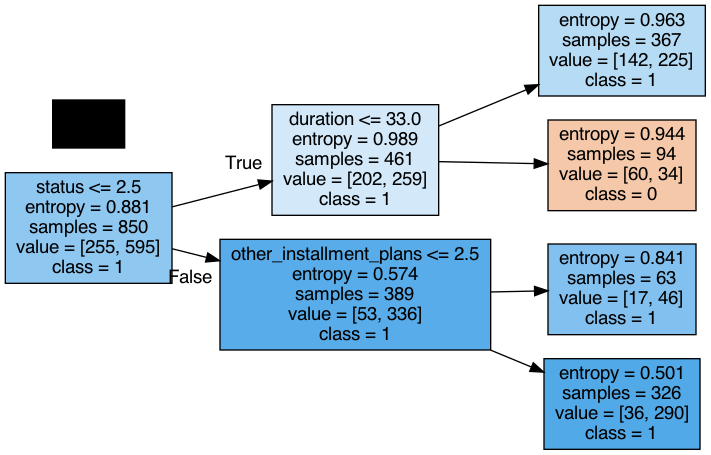

In [117]:
# 6.C. Gráfico de árbol para la regresión de Random Forest 

clfa = modeloRFC_Final.fit(Xtrain, np.ravel(Ytrain))
dot_data = tree.export_graphviz(decision_tree=clfa, 
                                out_file=None,
                                max_depth=None,
                                feature_names=['status',
                                             'duration',
                                             'credit_history',
                                             'purpose',
                                             'amount',
                                             'savings',
                                             'employment_duration',
                                             'installment_rate',
                                             'personal_status_sex',
                                             'other_debtors',
                                             'present_residence',
                                             'property',
                                             'age',
                                             'other_installment_plans',
                                             'housing',
                                             'number_credits',
                                             'job',
                                             'people_liable',
                                             'telephone',
                                             'foreign_worker'],
                                class_names=['0','1'],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###**Fin de la Actividad de la semana 6.**